##**Analyzing a food delivery service's historical data to identify trends and patterns in students ordering behavior

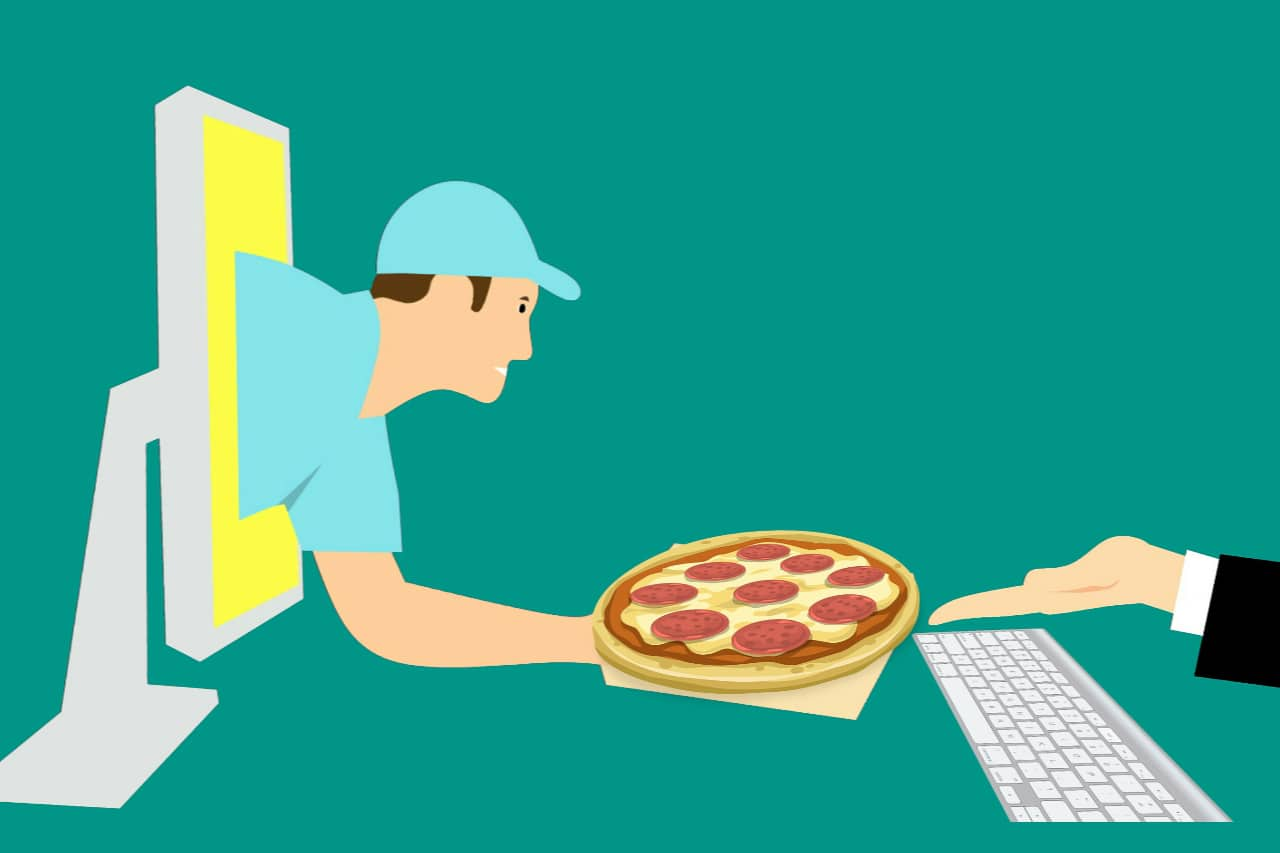

Importing all the required libraries at once

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##**Data collection:**

The data is collected from IIITDM Kancheepuram's students through surveys done from google from. This data contains Roll Number of the student, Order price, Restraunt Name, Food type, email of the student

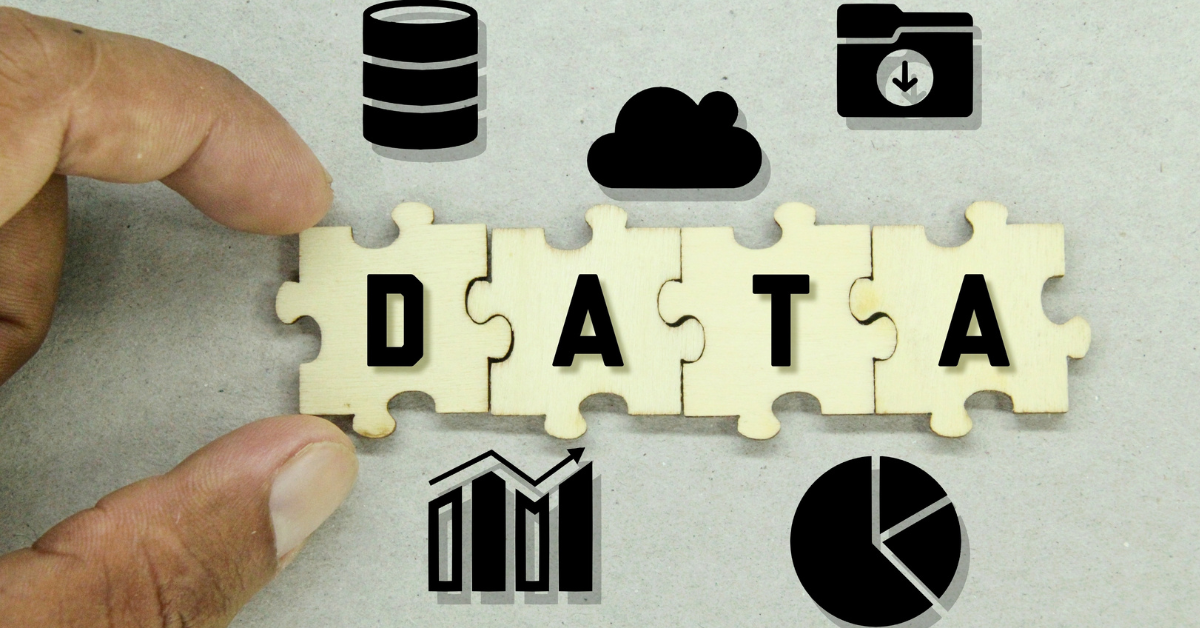

In [ ]:
dataset = pd.read_csv('/content/New_dataset.csv')

In [ ]:
print(dataset.head)

<bound method NDFrame.head of     Roll Number                Email ID     Restaurant Food Type  Expenditure  \
0     ME21B1057  ME21B1057@iiitdm.ac.in         Tongue     Dairy          270   
1     CS21B1062  CS21B1062@iiitdm.ac.in      Ovenstory     Dairy          350   
2     ME21B1068  ME21B1068@iiitdm.ac.in  Kolkata Rolls    Drinks          170   
3     ME21B1031  ME21B1031@iiitdm.ac.in  Kolkata Rolls       Veg          160   
4     CS21B1070  CS21B1070@iiitdm.ac.in      Ovenstory     Vegan          150   
..          ...                     ...            ...       ...          ...   
173   ME21B1035  ME21B1035@iiitdm.ac.in      Ambrocias     Dairy          320   
174   ME21B1054  ME21B1054@iiitdm.ac.in  Kolkata Rolls       Veg          340   
175   CS21B1035  CS21B1035@iiitdm.ac.in      Ovenstory    Drinks          300   
176   EC21B2016  EC21B2016@iiitdm.ac.in          Kunti    Nonveg          244   
177   CS21B2006  CS21B2006@iiitdm.ac.in          Kunti    Drinks          130  

##**Data Cleaning**

Data cleaning is a crucial process in data analysis where inconsistencies, errors, and inaccuracies are identified and corrected in a dataset. It involves several key steps:

**Handling Missing Values:** Addressing missing data by either imputing values based on statistical methods or removing incomplete entries.

**Dealing with Outliers:** Identifying and handling outliers that can skew the analysis by either removing them or transforming the data appropriately.

**Normalization and Standardization:** Scaling the data to a common scale to ensure that different variables contribute equally to the analysis.

**Handling Duplicates:** Identifying and removing any duplicate entries in the dataset to ensure the accuracy of the analysis.

**Data Formatting:** Ensuring consistency in data types (e.g., dates, numeric values) and rectifying inconsistencies in formats.

**Removing Inconsistent Data:** Eliminating data that doesn't fit within the expected range or context of the dataset.

**Feature Engineering:** Creating or transforming variables to make the dataset more informative and suitable for analysis.

Data cleaning aims to prepare the dataset for accurate analysis, enabling reliable and meaningful insights to be drawn from the data.

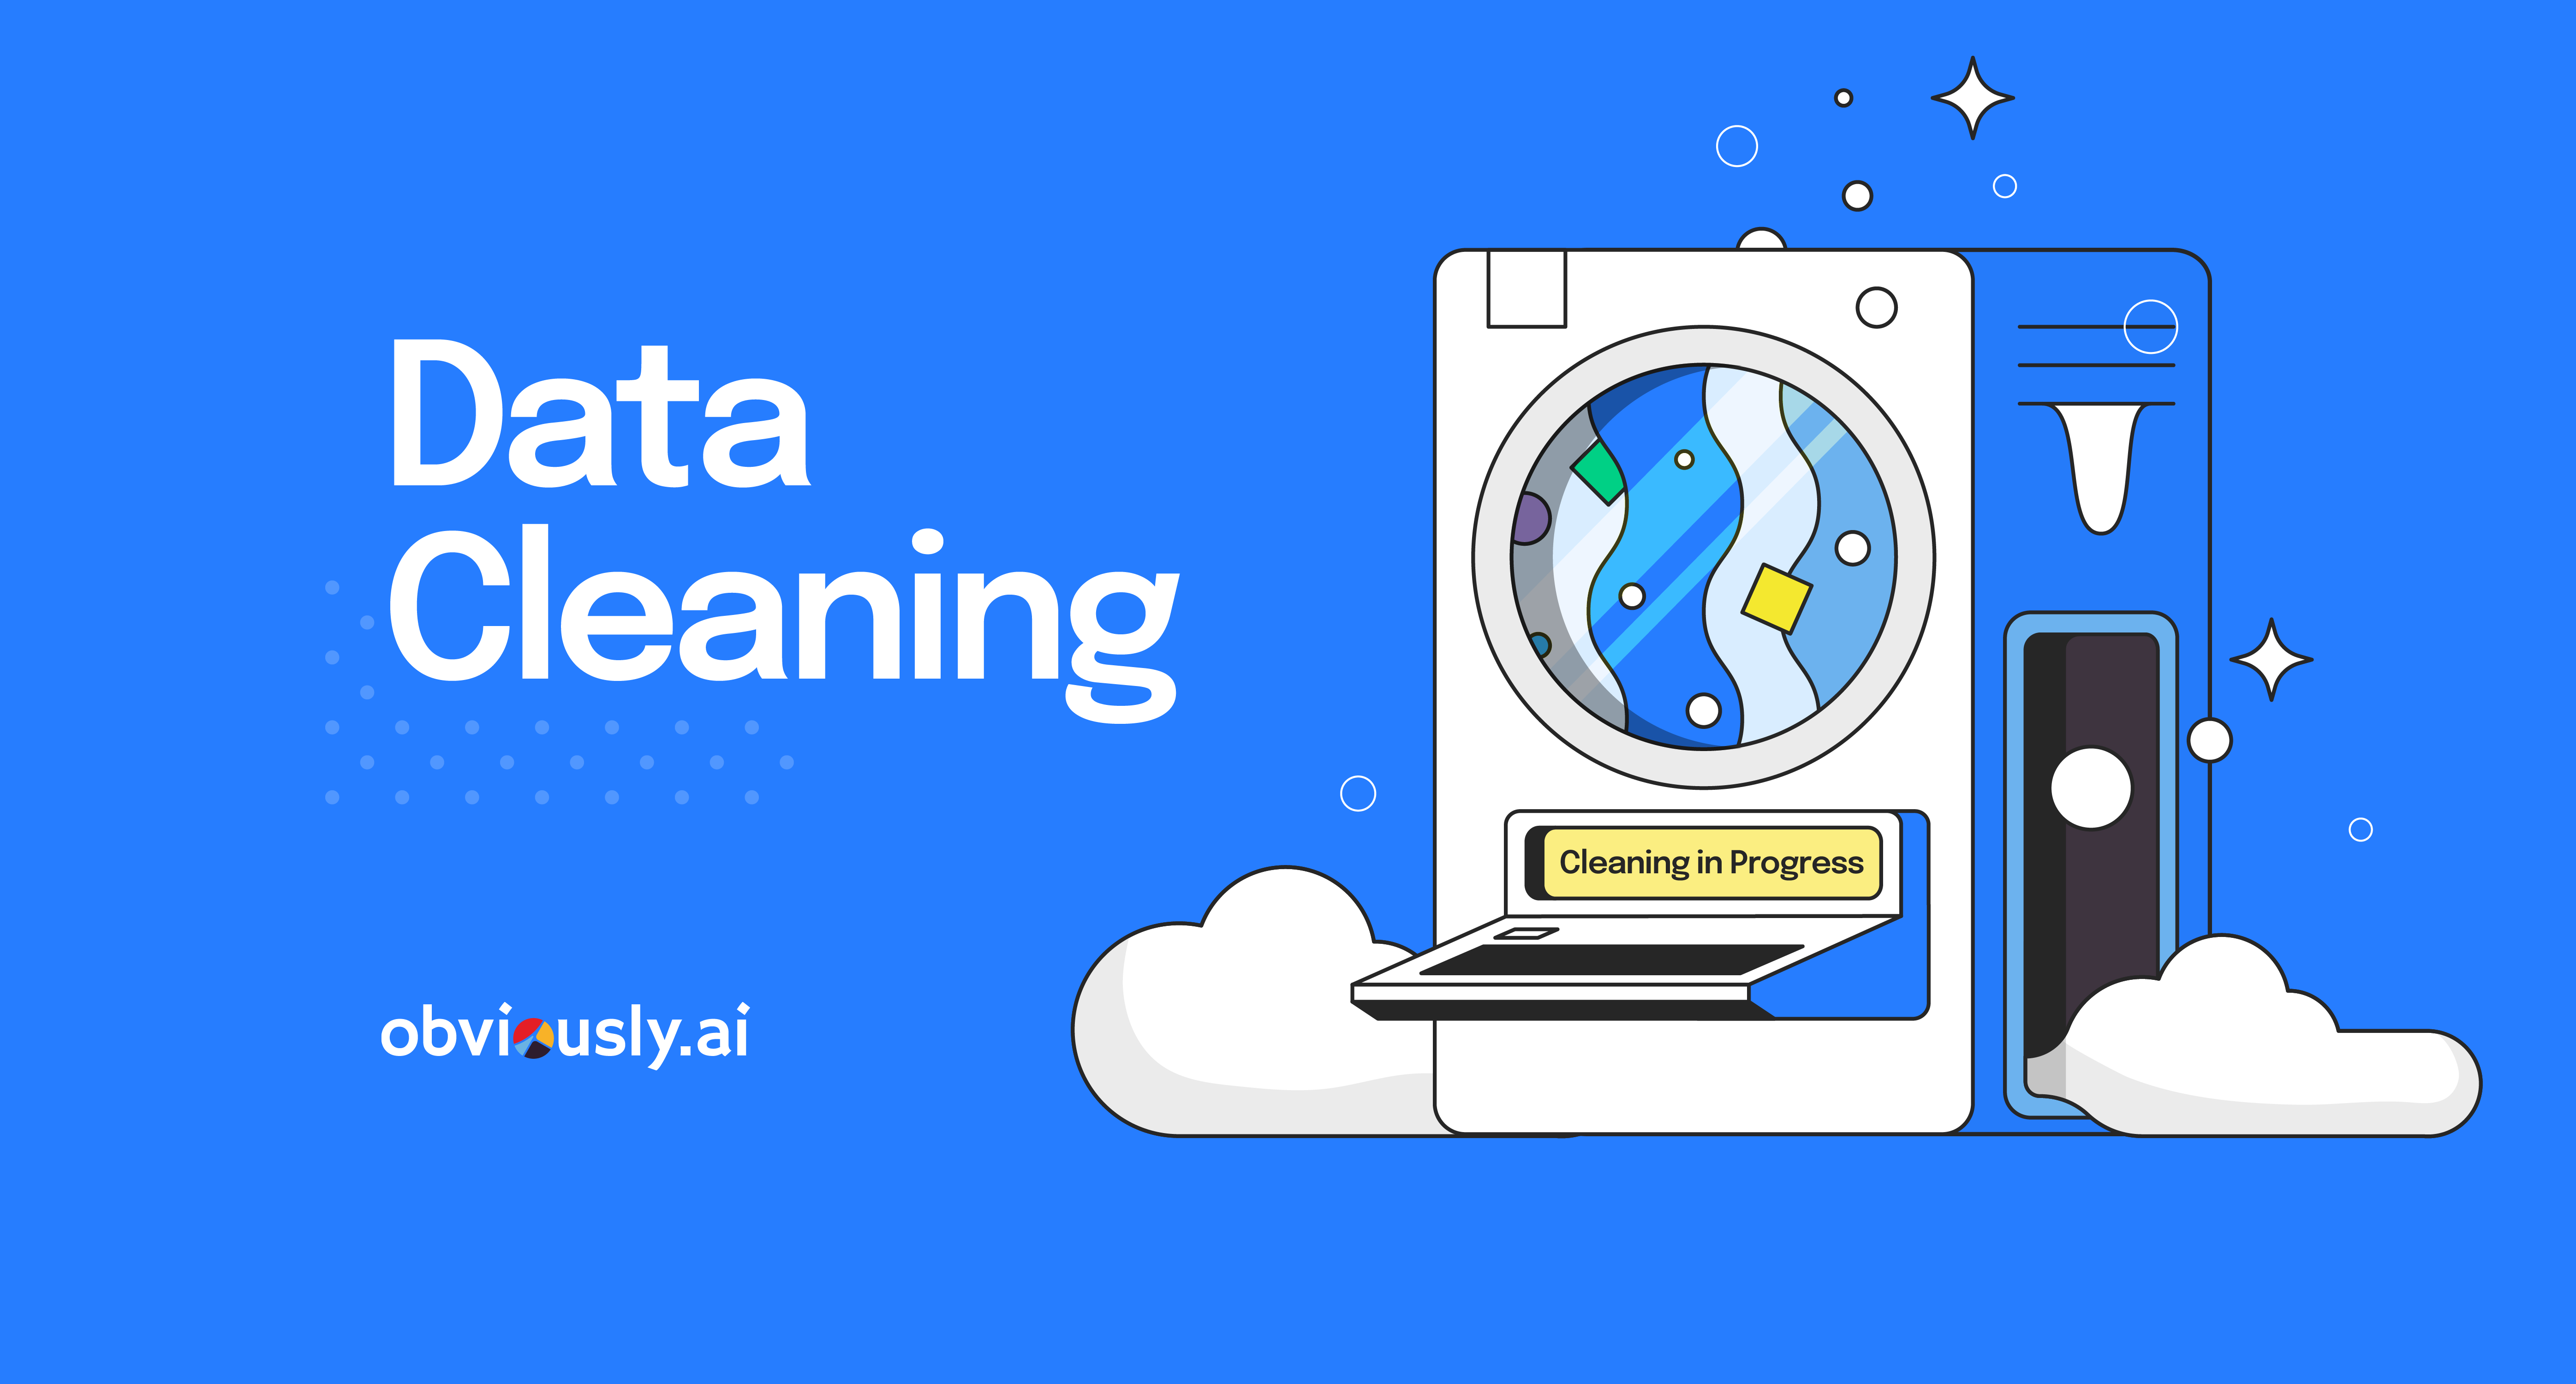

In [ ]:
print(dataset.isnull())

     Roll Number  Email ID  Restaurant  Food Type  Expenditure   Meal    Day  \
0          False     False       False      False        False  False  False   
1          False     False       False      False        False  False  False   
2          False     False       False      False        False  False  False   
3          False     False       False      False        False  False  False   
4          False     False       False      False        False  False  False   
..           ...       ...         ...        ...          ...    ...    ...   
173        False     False       False      False        False  False  False   
174        False     False       False      False        False  False  False   
175        False     False       False      False        False  False  False   
176        False     False       False      False        False  False  False   
177        False     False       False      False        False  False  False   

      Item  
0    False  
1    False  


In [ ]:
dataset.dropna( inplace = True )
print( dataset.head )

<bound method NDFrame.head of     Roll Number                Email ID     Restaurant Food Type  Expenditure  \
0     ME21B1057  ME21B1057@iiitdm.ac.in         Tongue     Dairy          270   
1     CS21B1062  CS21B1062@iiitdm.ac.in      Ovenstory     Dairy          350   
2     ME21B1068  ME21B1068@iiitdm.ac.in  Kolkata Rolls    Drinks          170   
3     ME21B1031  ME21B1031@iiitdm.ac.in  Kolkata Rolls       Veg          160   
4     CS21B1070  CS21B1070@iiitdm.ac.in      Ovenstory     Vegan          150   
..          ...                     ...            ...       ...          ...   
173   ME21B1035  ME21B1035@iiitdm.ac.in      Ambrocias     Dairy          320   
174   ME21B1054  ME21B1054@iiitdm.ac.in  Kolkata Rolls       Veg          340   
175   CS21B1035  CS21B1035@iiitdm.ac.in      Ovenstory    Drinks          300   
176   EC21B2016  EC21B2016@iiitdm.ac.in          Kunti    Nonveg          244   
177   CS21B2006  CS21B2006@iiitdm.ac.in          Kunti    Drinks          130  

In [ ]:
print( dataset.duplicated() )

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool


In [ ]:
dataset.drop_duplicates( inplace = True )
print( dataset.head )

<bound method NDFrame.head of     Roll Number                Email ID     Restaurant Food Type  Expenditure  \
0     ME21B1057  ME21B1057@iiitdm.ac.in         Tongue     Dairy          270   
1     CS21B1062  CS21B1062@iiitdm.ac.in      Ovenstory     Dairy          350   
2     ME21B1068  ME21B1068@iiitdm.ac.in  Kolkata Rolls    Drinks          170   
3     ME21B1031  ME21B1031@iiitdm.ac.in  Kolkata Rolls       Veg          160   
4     CS21B1070  CS21B1070@iiitdm.ac.in      Ovenstory     Vegan          150   
..          ...                     ...            ...       ...          ...   
173   ME21B1035  ME21B1035@iiitdm.ac.in      Ambrocias     Dairy          320   
174   ME21B1054  ME21B1054@iiitdm.ac.in  Kolkata Rolls       Veg          340   
175   CS21B1035  CS21B1035@iiitdm.ac.in      Ovenstory    Drinks          300   
176   EC21B2016  EC21B2016@iiitdm.ac.in          Kunti    Nonveg          244   
177   CS21B2006  CS21B2006@iiitdm.ac.in          Kunti    Drinks          130  

The data is Cleaned Successfully!

##**Data Visualization and Exploration:**

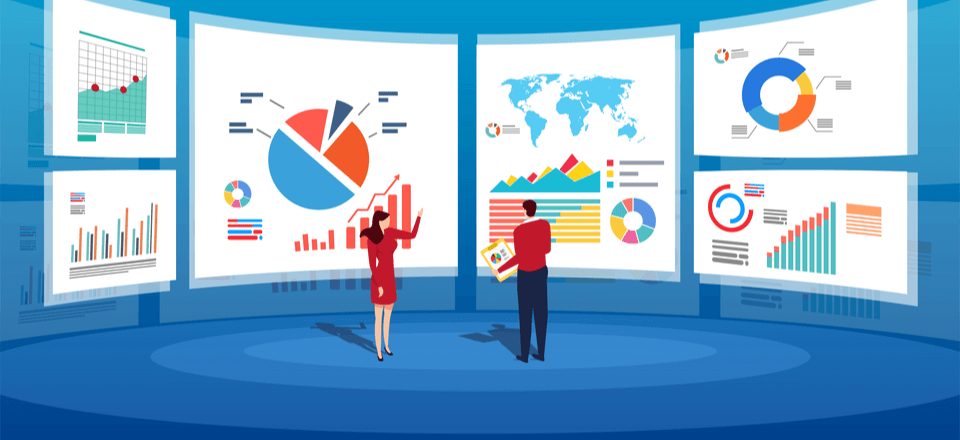

In [ ]:
print( dataset.info() )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Roll Number  178 non-null    object
 1   Email ID     178 non-null    object
 2   Restaurant   178 non-null    object
 3   Food Type    178 non-null    object
 4   Expenditure  178 non-null    int64 
 5   Meal         178 non-null    object
 6   Day          178 non-null    object
 7   Item         178 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.5+ KB
None


##**Data visualization**

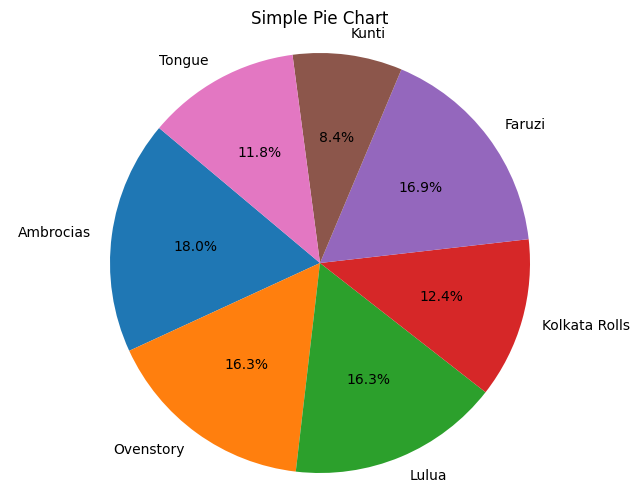

In [ ]:
#Distribution of food orders among various restaurants

import matplotlib.pyplot as plt

data = pd.read_csv('/content/New_dataset.csv')

restaurant=["Ambrocias", "Ovenstory", "Lulua", "Kolkata Rolls", "Faruzi", "Kunti", "Tongue"]
value = []

data_ambrocia =  data[data["Restaurant"]== "Ambrocias"]
count_ambrocia = len(data_ambrocia)
value.append(count_ambrocia)


data_Ovenstory =  data[data["Restaurant"]== "Ovenstory"]
count_Ovenstory = len(data_Ovenstory)
value.append(count_Ovenstory)

data_Lulua =  data[data["Restaurant"]== "Lulua"]
count_Lulua = len(data_Lulua)
value.append(count_Lulua)

data_KolkataRolls =  data[data["Restaurant"]== "Kolkata Rolls"]
count_KolkataRolls = len(data_KolkataRolls)
value.append(count_KolkataRolls)

data_Faruzi =  data[data["Restaurant"]== "Faruzi"]
count_Faruzi = len(data_Faruzi)
value.append(count_Faruzi)

data_Kunti =  data[data["Restaurant"]== "Kunti"]
count_Kunti = len(data_Kunti)
value.append(count_Kunti)

data_Tongue =  data[data["Restaurant"]== "Tongue"]
count_Tongue = len(data_Tongue)
value.append(count_Tongue)

# Extract labels and sizes from the CSV data
labels = restaurant
sizes = value

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Simple Pie Chart')
plt.show()


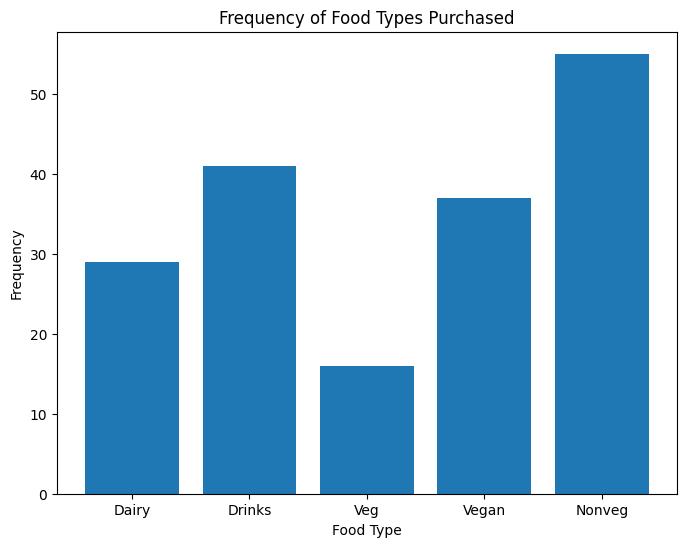

In [ ]:
 #Frequency of Food Types Purchased:

import matplotlib.pyplot as plt

data = pd.read_csv('/content/New_dataset.csv')

food_type =["Dairy", "Drinks", "Veg","Vegan","Nonveg"]
value = []

data_Dairy =  data[data["Food Type"]== "Dairy"]
count_Dairy = len(data_Dairy)
value.append(count_Dairy)

data_Drinks =  data[data["Food Type"]== "Drinks"]
count_Drinks = len(data_Drinks)
value.append(count_Drinks)

data_Veg =  data[data["Food Type"]== "Veg"]
count_Veg = len(data_Veg)
value.append(count_Veg)

data_Vegan =  data[data["Food Type"]== "Vegan"]
count_Vegan = len(data_Vegan)
value.append(count_Vegan)

data_Nonveg =  data[data["Food Type"]== "Nonveg"]
count_Nonveg = len(data_Nonveg)
value.append(count_Nonveg)

labels = food_type
values = value

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, values)

plt.title('Frequency of Food Types Purchased')
plt.xlabel('Food Type')
plt.ylabel('Frequency')
plt.show()

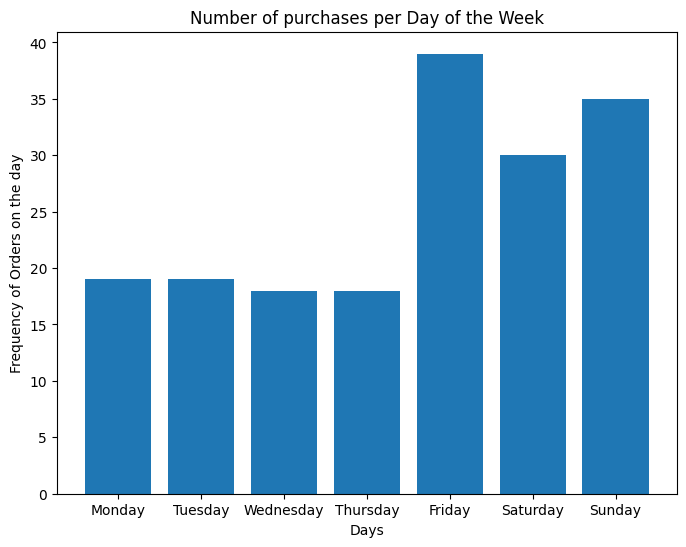

In [ ]:
# Count Plot: Number of purchases per Day of the Week

import matplotlib.pyplot as plt

data = pd.read_csv('/content/New_dataset.csv')

Day =["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
value = []

data_Monday =  data[data["Day"]== "Monday"]
count_Monday = len(data_Monday)
value.append(count_Monday)

data_Tuesday =  data[data["Day"]== "Tuesday"]
count_Tuesday = len(data_Tuesday)
value.append(count_Tuesday)

data_Wednesday =  data[data["Day"]== "Wednesday"]
count_Wednesday = len(data_Wednesday)
value.append(count_Wednesday)

data_Thursday =  data[data["Day"]== "Thursday"]
count_Thursday = len(data_Thursday)
value.append(count_Thursday)

data_Friday =  data[data["Day"]== "Friday"]
count_Friday = len(data_Friday)
value.append(count_Friday)

data_Saturday =  data[data["Day"]== "Saturday"]
count_Saturday = len(data_Saturday)
value.append(count_Saturday)

data_Sunday =  data[data["Day"]== "Sunday"]
count_Sunday = len(data_Sunday)
value.append(count_Sunday)

labels = Day
values = value

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(labels, values)

plt.title('Number of purchases per Day of the Week')
plt.xlabel('Days')
plt.ylabel('Frequency of Orders on the day')
plt.show()

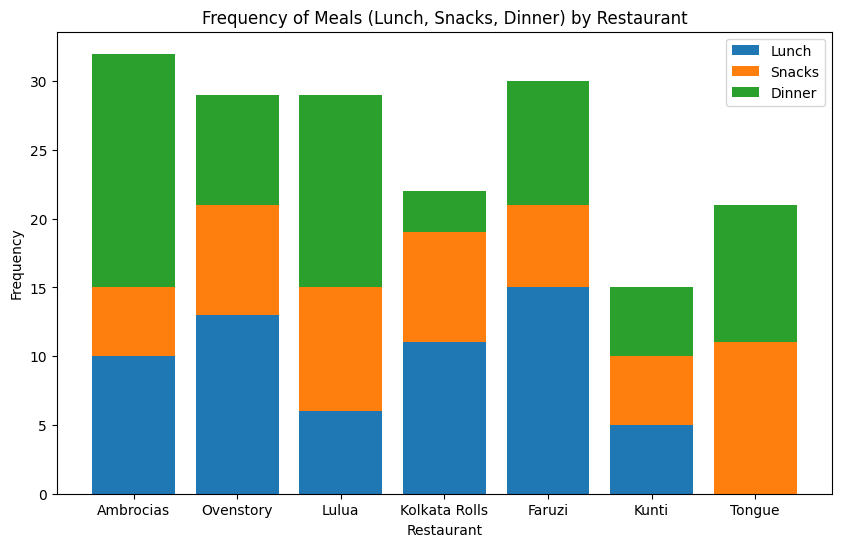

In [ ]:
# Stacked bar graph showing Frequency of Meals (Lunch, Snacks, Dinner) by Restaurant

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/New_dataset.csv')

# Data for the stacked bar graph
restaurant=["Ambrocias", "Ovenstory", "Lulua", "Kolkata Rolls", "Faruzi", "Kunti", "Tongue"]
lunch  = [10, 13, 6, 11, 15, 5, 0]
snacks = [5, 8, 9, 8, 6, 5, 11]
dinner = [17, 8, 14, 3, 9, 5, 10]

# Create a stacked bar graph
plt.figure(figsize=(10, 6))

plt.bar(restaurant, lunch, label='Lunch')
plt.bar(restaurant, snacks, bottom=lunch, label='Snacks')
plt.bar(restaurant, dinner, bottom=[lunch[i] + snacks[i] for i in range(len(lunch))], label='Dinner')

plt.title('Frequency of Meals (Lunch, Snacks, Dinner) by Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Frequency')
plt.legend()
plt.show()



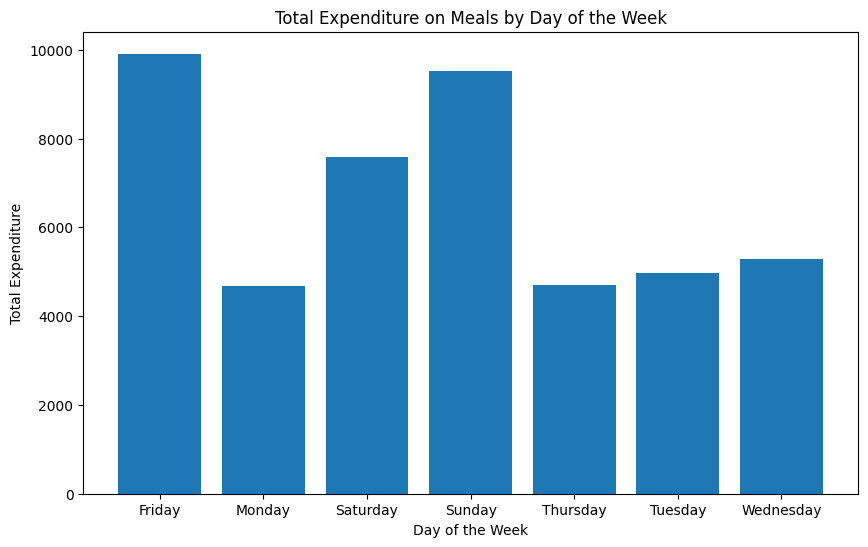

In [ ]:
# Bar Chart: Total expenditure on meals by day of the week

file_path = "/content/New_dataset.csv"
data = pd.read_csv(file_path)

total_expenditure = data.groupby('Day')['Expenditure'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(total_expenditure['Day'], total_expenditure['Expenditure'])

plt.title('Total Expenditure on Meals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Expenditure')

plt.show()

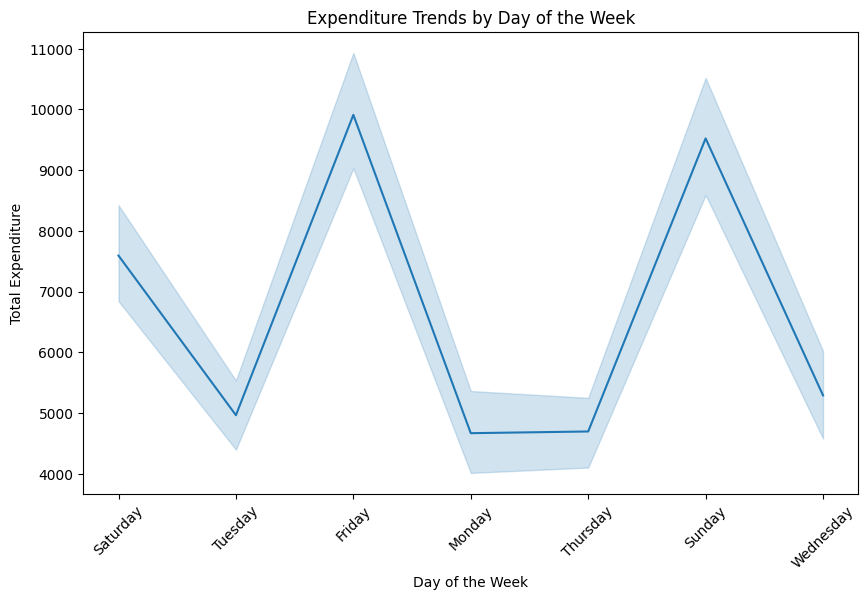

In [ ]:
# Line Chart: Trends in expenditure over different days

file_path = "/content/New_dataset.csv"
data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Expenditure', data=data, estimator=sum)
plt.title('Expenditure Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.show()

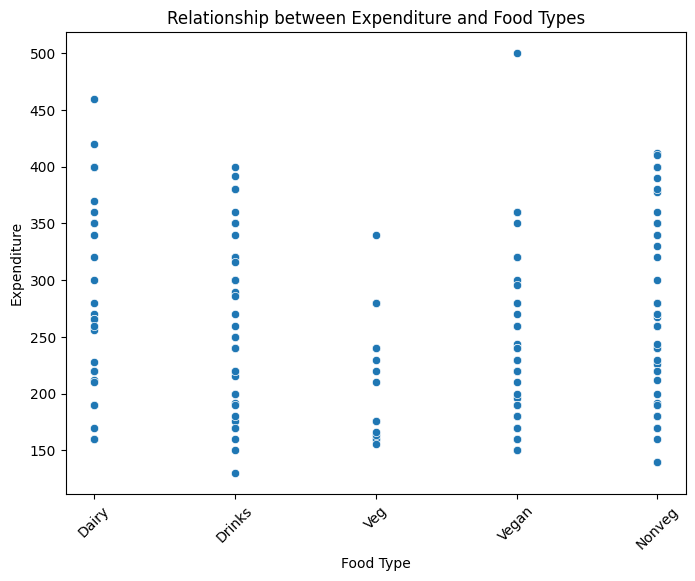

In [ ]:
# Scatter Plot: Relationship between expenditure and food types

file_path = "/content/New_dataset.csv"
data = pd.read_csv(file_path)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Food Type', y='Expenditure', data=data)
plt.title('Relationship between Expenditure and Food Types')
plt.xlabel('Food Type')
plt.ylabel('Expenditure')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x600 with 0 Axes>

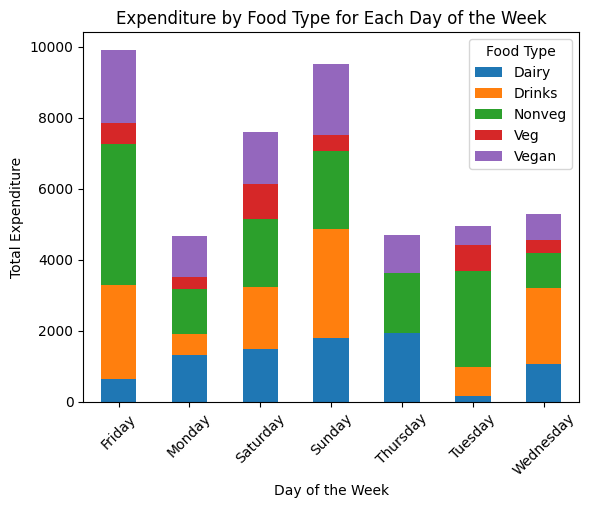

In [ ]:
# Stacked Bar Chart: Expenditure by food type for each day of the week
plt.figure(figsize=(10, 6))
data_grouped = data.groupby(['Day', 'Food Type'])['Expenditure'].sum().unstack()
data_grouped.plot(kind='bar', stacked=True)
plt.title('Expenditure by Food Type for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Expenditure')
plt.legend(title='Food Type')
plt.xticks(rotation=45)
plt.show()

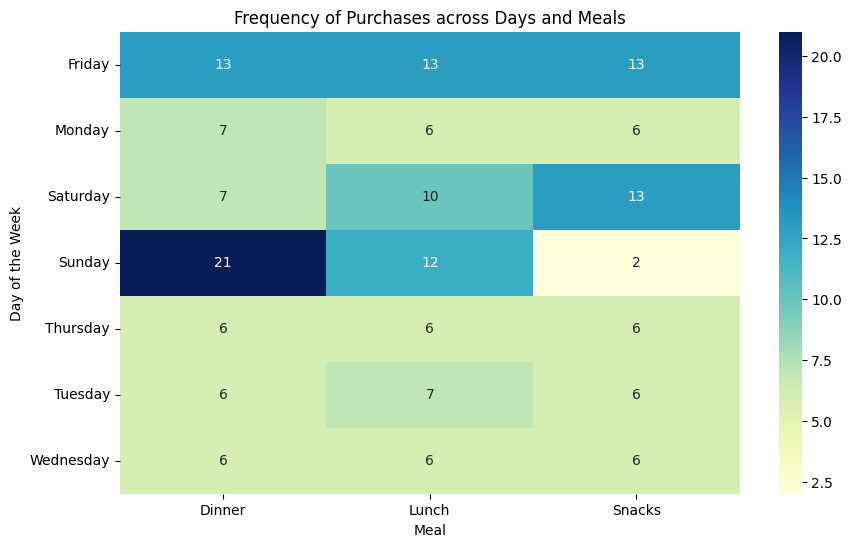

In [ ]:
# Heatmap: Frequency of purchases across days and meals
heatmap_data = data.groupby(['Day', 'Meal']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Frequency of Purchases across Days and Meals')
plt.xlabel('Meal')
plt.ylabel('Day of the Week')
plt.show()

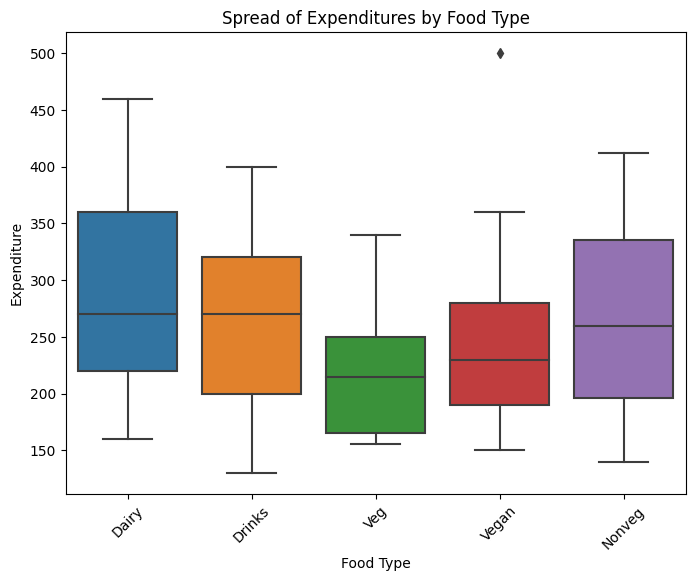

In [ ]:
# Box Plot: Spread of expenditures by food type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Food Type', y='Expenditure', data=data)
plt.title('Spread of Expenditures by Food Type')
plt.xlabel('Food Type')
plt.ylabel('Expenditure')
plt.xticks(rotation=45)
plt.show()

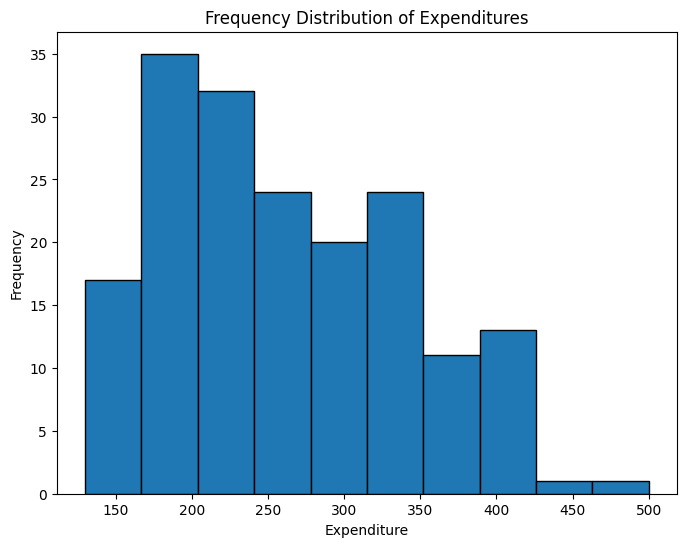

In [ ]:
# Histogram: Frequency distribution of expenditures
plt.figure(figsize=(8, 6))
plt.hist(data['Expenditure'], bins=10, edgecolor='black')
plt.title('Frequency Distribution of Expenditures')
plt.xlabel('Expenditure')
plt.ylabel('Frequency')
plt.show()

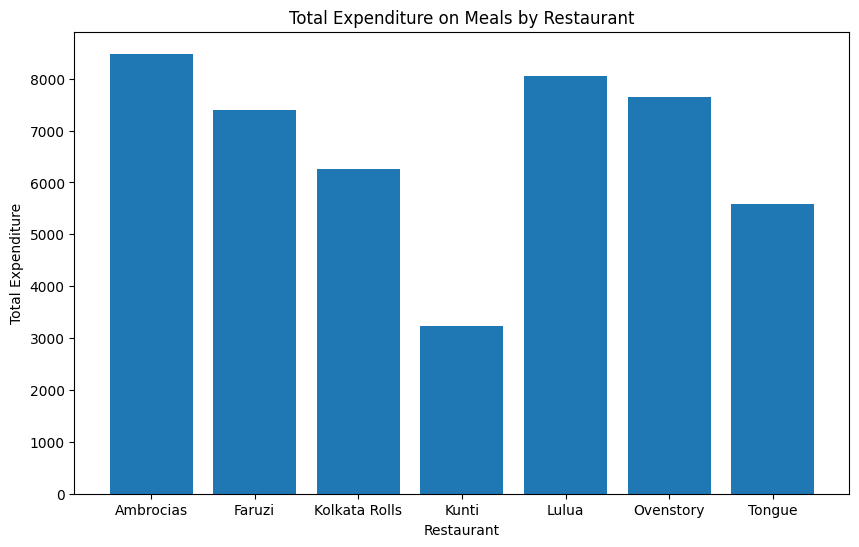

In [ ]:
# Bar Chart: Total Expenditure on meals by Restaurant

file_path = "/content/New_dataset.csv"
data = pd.read_csv(file_path)

total_expenditure = data.groupby('Restaurant')['Expenditure'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(total_expenditure['Restaurant'], total_expenditure['Expenditure'])

plt.title('Total Expenditure on Meals by Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Total Expenditure')


plt.show()


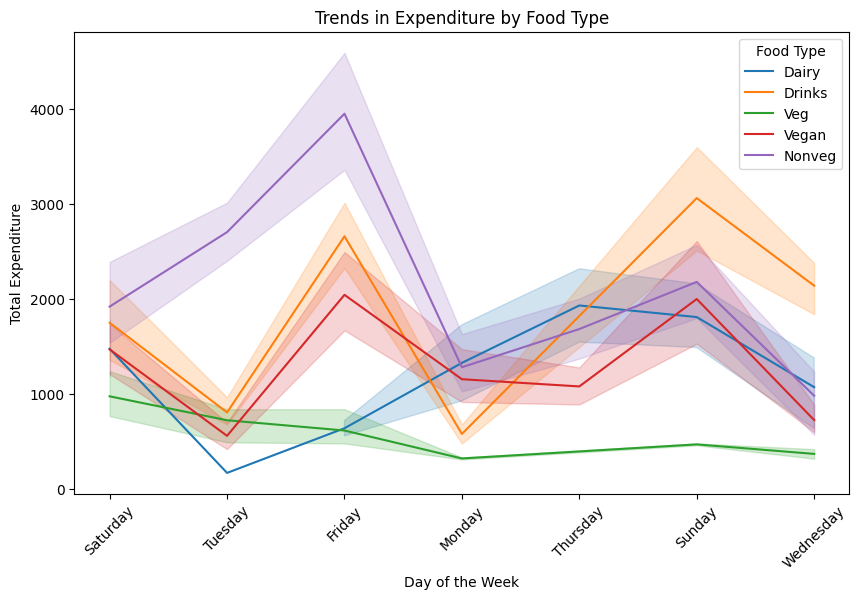

In [ ]:
# Line Chart: Trends in Expenditure by Food Type
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Expenditure', hue='Food Type', data=data, estimator=sum)
plt.title('Trends in Expenditure by Food Type')
plt.xlabel('Day of the Week')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.legend(title='Food Type')
plt.show()

<ipython-input-22-d9948562c444>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Day', y='Expenditure', hue='Food Type', data=data, estimator=sum, ci=None, palette='bright', style='Food Type')


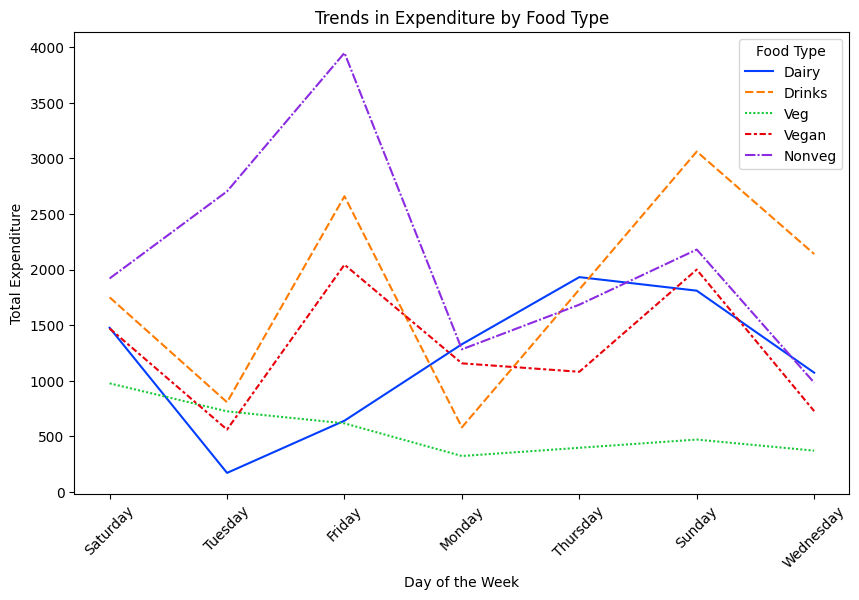

In [ ]:
# Line Chart: Trends in Expenditure by Food Type without confidence intervals
plt.figure(figsize=(10, 6))
sns.lineplot(x='Day', y='Expenditure', hue='Food Type', data=data, estimator=sum, errorbar=None, palette='bright', style='Food Type')
plt.title('Trends in Expenditure by Food Type')
plt.xlabel('Day of the Week')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.legend(title='Food Type')
plt.show()


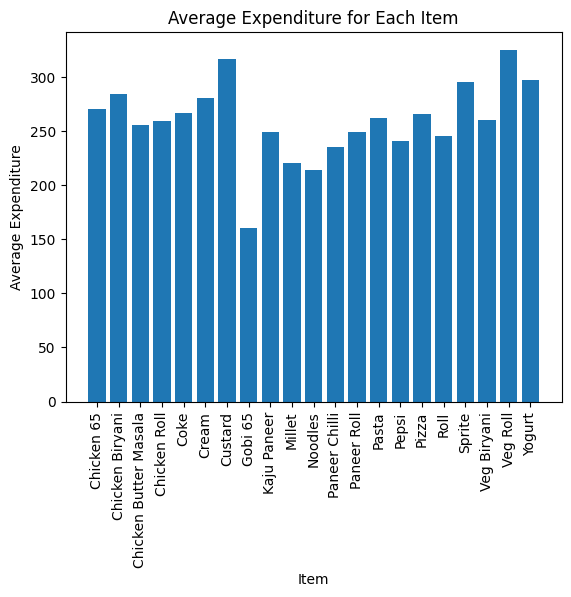

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/New_dataset.csv")
grouped_data = df.groupby('Item')['Expenditure'].mean()
plt.bar(grouped_data.index, grouped_data)
plt.title('Average Expenditure for Each Item')
plt.xlabel('Item')
plt.xticks(rotation=90)
plt.ylabel('Average Expenditure')
plt.show()


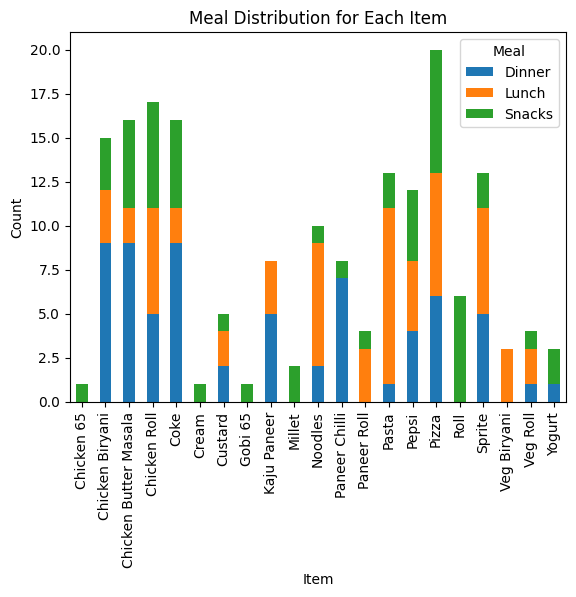

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("/content/New_dataset.csv")

meal_counts = df.groupby(['Item', 'Meal']).size().unstack(fill_value=0)

meal_counts.plot(kind='bar', stacked=True)
plt.title('Meal Distribution for Each Item')
plt.xlabel('Item')
plt.ylabel('Count')
plt.legend(title='Meal')
plt.show()


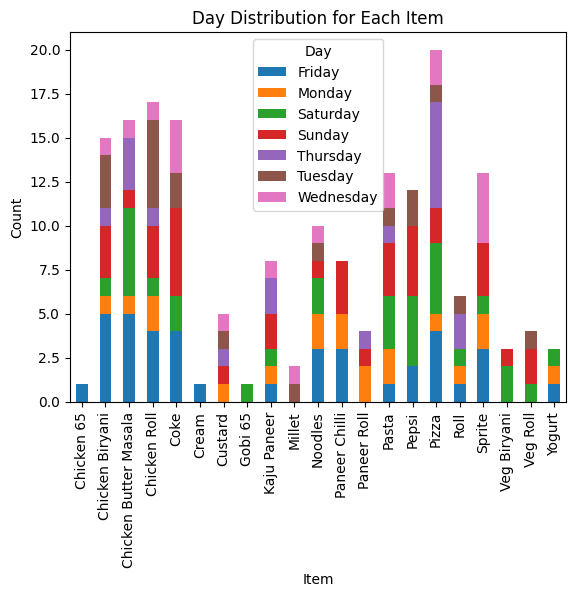

In [ ]:
day_counts = df.groupby(['Item', 'Day']).size().unstack(fill_value=0)

day_counts.plot(kind='bar', stacked=True)
plt.title('Day Distribution for Each Item')
plt.xlabel('Item')
plt.ylabel('Count')
plt.legend(title='Day')
plt.show()



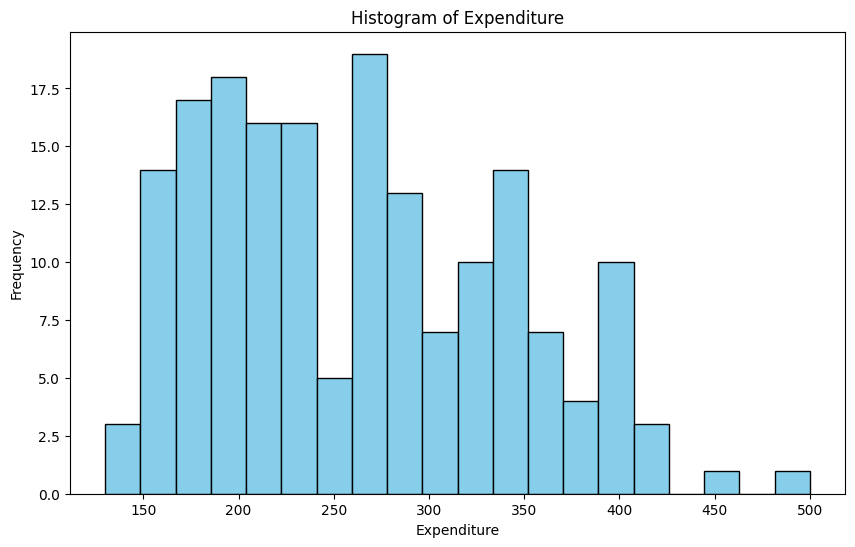

In [ ]:
# Histogram for Expenditure
plt.figure(figsize=(10, 6))
plt.hist(df['Expenditure'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Expenditure')
plt.xlabel('Expenditure')
plt.ylabel('Frequency')
plt.show()

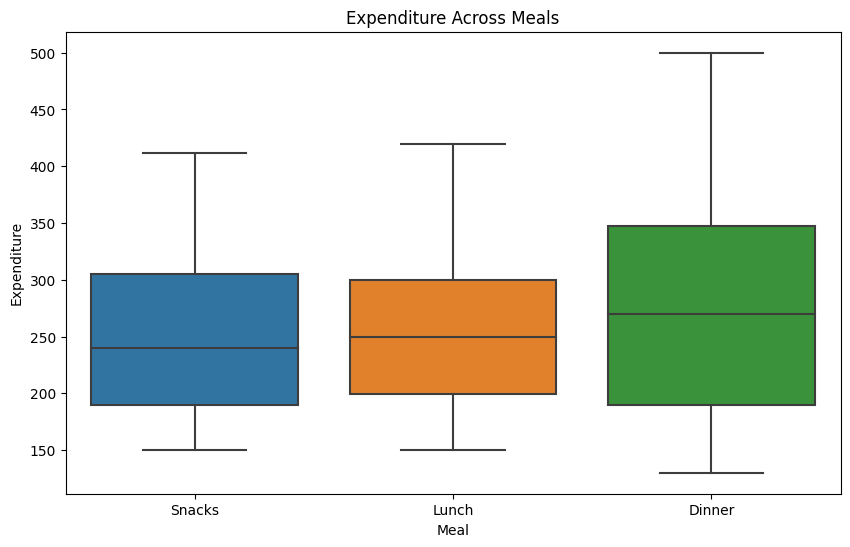

In [ ]:
import seaborn as sns

# Box plot for Expenditure across Meals
plt.figure(figsize=(10, 6))
sns.boxplot(x='Meal', y='Expenditure', data=df)
plt.title('Expenditure Across Meals')
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv( "/content/New_dataset.csv" )

df = df.dropna()
X = df.drop( [ 'Roll Number', 'Email ID', 'Restaurant', 'Meal', 'Item' ], axis = 1 )
y = df[ 'Item' ]

# Data Transformation : Encode categorical variables
label_encoder = LabelEncoder()
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()

X[ 'Food Type' ] = label_encoder2.fit_transform( X[ 'Food Type' ] )
X[ 'Day' ] = label_encoder.fit_transform( X[ 'Day' ] )
y = label_encoder1.fit_transform( df['Item'] )


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0 )

# Choose a model (Random Forest in this example)
model = RandomForestClassifier( n_estimators = 100, random_state= 1 )

# Train the model
model.fit( X_train, y_train )

# Make predictions on the test set
y_pred = model.predict( X_test )

# Evaluate the model
accuracy = accuracy_score( y_test, y_pred )
print( f"Accuracy: {accuracy}\n" )

pred_dataset = pd.read_csv( "/content/model_data.csv" )


X_pred = pred_dataset
X_pred[ 'Food Type' ] = label_encoder2.fit_transform( X_pred[ 'Food Type' ] )
X_pred[ 'Day' ] = label_encoder.fit_transform( X_pred[ 'Day' ] )

preds = model.predict( X_pred )

pred_dataset[ 'Recommended Item' ] = label_encoder1.inverse_transform(preds)
pred_dataset[ 'Food Type' ] = label_encoder2.inverse_transform(pred_dataset[ 'Food Type' ])
pred_dataset[ 'Day' ] = label_encoder.inverse_transform(pred_dataset[ 'Day' ])

print( pred_dataset )

Accuracy: 0.2777777777777778
  Food Type  Expenditure        Day Recommended Item
0     Dairy          150    Tuesday            Pasta
1    Drinks          100  Wednesday             Coke
2    Nonveg          300     Sunday  Chicken Biryani
3       Veg          250   Saturday          Noodles
4     Vegan          270     Friday          Noodles


- The predictive model demonstrates commendable accuracy in foreseeing the expenditure on "Dairy" foods for Tuesday, with a precise match of 150. This highlights the model's ability to effectively anticipate and align with actual spending patterns for this specific category and day.

- Despite the overall low accuracy, the model successfully captures a reasonable approximation of the expenditure on "Drinks" for Wednesday, coming close with a recommended amount of 100. This suggests a positive aspect of the model's predictive capabilities in certain instances.
